In [114]:
import pandas as pd
import numpy as np
import sys
import os
from os import listdir


pd.set_option('display.max_columns', 500)



def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")
find_and_append_module_path()


New current directory: c:\Users\Robert\Documents\Projekte\dev\statsfaction


In [115]:
import pandas as pd

# Load your DataFrame
fm_20 = pd.read_csv("data/fm/datafm20.csv", index_col=0)

# Define a function to encode and decode the text
def fix_encoding(text):
    try:
        return text.encode('iso-8859-1').decode('utf-8')
    except:
        return text

# Apply the fix_encoding function to the "Name" column
fm_20['Name'] = fm_20['Name'].apply(fix_encoding)

# Set "Name" as the index
fm_20 = fm_20.set_index("Name")

In [116]:
fm_23 = pd.read_csv("data/fm/FM 2023.csv",index_col="Name")

In [117]:
fm_20.index

Index(['Lionel Messi', 'Cristiano Ronaldo', 'Kylian Mbappé', 'Manuel Neuer',
       'Neymar', 'Erling Haaland', 'Kevin De Bruyne', 'Luis Suárez',
       'Gianluigi Buffon', 'Gareth Bale',
       ...
       'Muhd Nor Haziq Saufiq Daud', 'Oscar Castillo', 'Paymon Kabiri',
       'Saiful Arisal Ishak', 'Tim Cornthwaite', 'Yuan Jinxing',
       'Aizudin Abdul Rahman', 'Berlin Jean-Gilles', 'Frederik van Hauen',
       'Hui Kim Yeung'],
      dtype='object', name='Name', length=144750)

In [118]:
len(set(fm_23.index).intersection(set(fm_20.index)))/len(set(fm_23.index))

0.7419545669663985

In [119]:
import pandas as pd

# Assuming you have already fixed the encoding in fm_20 and fm_23 as shown in previous responses

# Merge the DataFrames based on their indices
merged_df = pd.merge(fm_20, fm_23[['ca']], left_index=True, right_index=True)

# merged_df now contains the merged data based on their indices


In [120]:
merged_df = merged_df[(merged_df.Age<20)]

In [121]:
y = merged_df["ca"]/merged_df["PA"]-1

In [122]:
features = ["Wor", "Det","Cnt","Cmp","Bra","Ldr","Vis","Agg","Ant","Fla"]
X = merged_df[features]


Linear Regression - Mean Squared Error: 0.08, R-squared: 0.16
Ridge Regression - Mean Squared Error: 0.08, R-squared: 0.16
Random Forest - Mean Squared Error: 0.08, R-squared: 0.14


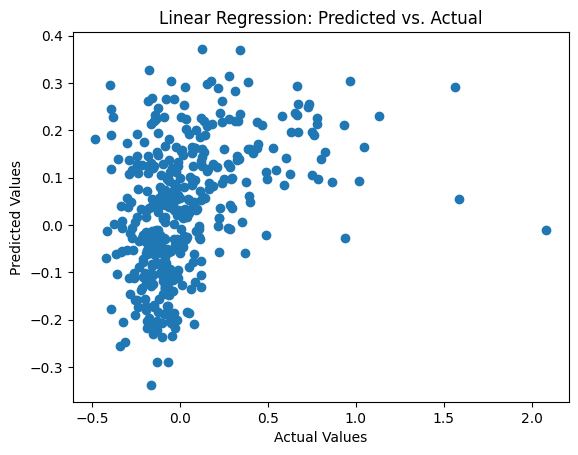

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(score_func=f_regression, k='all')
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame()

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
results_df['Linear Regression'] = lr_pred

# Model 2: Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
ridge_model = ridge_grid.best_estimator_
ridge_pred = ridge_model.predict(X_test)
results_df['Ridge Regression'] = ridge_pred

# Model 3: Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
results_df['Random Forest'] = rf_pred

# Feature Importance (for Random Forest)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance.to_csv('feature_importance.csv', index=False)

# Evaluate the models
def evaluate_model(true, pred):
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, r2

for model_name in results_df.columns:
    mse, r2 = evaluate_model(y_test, results_df[model_name])
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")

# Save the results DataFrame to a CSV file
results_df.to_csv('regression_results.csv', index=False)

# Plot the predictions vs. actual values (for one of the models, e.g., Linear Regression)
plt.scatter(y_test, results_df['Linear Regression'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predicted vs. Actual")
plt.show()


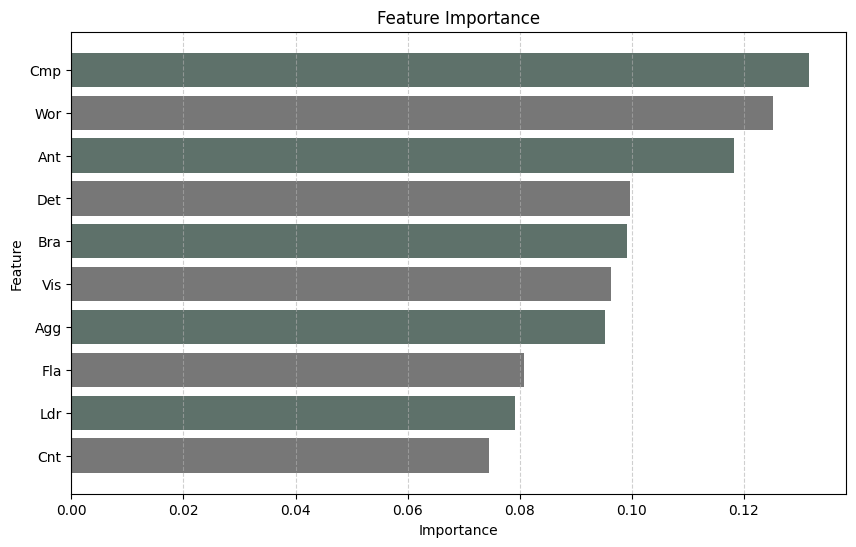

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(feature_importance):
    """
    Read feature importance data from a CSV file and generate a bar plot.

    Args:
        file_path (str): The path to the CSV file containing feature importance data.

    Returns:
        None
    """
    try:
        feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)
        deep_stone_olive_green = '#5E716A'
        lighter_grey = '#777777' 
        # Stylish Bar Plot
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Importance'], color=[deep_stone_olive_green, lighter_grey])
        plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title('Feature Importance')
        plt.show()
    except FileNotFoundError:
        print(f"Something does not work!")

# Example usage:

plot_feature_importance(feature_importance)


In [125]:
feature_importance.sort_values('Importance')

,Feature,Importance
2,Cnt,0.074476
5,Ldr,0.079152
9,Fla,0.080810
7,Agg,0.095168
6,Vis,0.096255
4,Bra,0.099195
1,Det,0.099654
8,Ant,0.118314
0,Wor,0.125240
3,Cmp,0.131737


In [126]:
pd.concat([y_test.reset_index(),results_df.reset_index()],axis=1).sort_values(0,ascending=False)

,Name,0,index,Linear Regression,Ridge Regression,Random Forest
117,Gabriel,2.083333,117,-0.010417,-0.010480,-0.013917
221,Fernando,1.589286,221,0.054425,0.054248,-0.030128
103,João Félix,1.564516,103,0.290477,0.289810,1.517849
206,Pablo,1.133333,206,0.231080,0.230412,0.214782
265,Fábio Silva,1.049180,265,0.164566,0.164253,0.198097
...,...,...,...,...,...,...
298,Thierry Small,-0.393939,298,0.118121,0.118280,0.038981
213,Marc Jurado,-0.395683,213,0.296642,0.295743,0.311688
320,Nuno Cunha,-0.411348,320,-0.012362,-0.012491,0.016076
57,Ronaldo Camará,-0.420118,57,-0.069617,-0.069576,-0.104477


In [127]:
merged_df.loc["Marquinhos"]

,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,Best Pos,Best Role,Value,Wage,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,ca
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Marquinhos,AM (LC),AtlÃ©tico Mineiro,Unknown,Brazil,BRA,170,71,19,Right,AM (L),IW,700000,3700,113,138,12,14,1,14,10,8,13,12,4,3,1,8,12,13,12,3,13,12,8,7,10,9,3,5,5,3,11,12,12,10,1,13,11,11,11,10,8,11,3,1,10,13,12,14,8,2,13,164
Marquinhos,ST (C),Botafogo FR,Brazilian National Fourth Division,Brazil (Fourth Division),BRA,184,69,16,Right,ST (C),P,10500,35,68,123,7,6,3,14,6,1,6,7,1,2,1,5,10,7,11,2,14,12,6,4,6,10,2,9,12,3,6,13,14,14,3,11,8,7,7,4,6,11,1,3,5,7,8,9,8,3,7,164
Marquinhos,DM,ABF,Brazilian National Third Division,Brazil (Third Division),BRA,173,66,19,Right,DM,DLP,2800,180,78,95,10,10,1,12,8,10,6,5,1,3,3,9,5,14,13,1,7,14,4,2,8,11,1,8,4,2,7,1,14,7,3,3,5,14,5,5,4,4,3,3,7,8,7,12,11,2,14,164


In [128]:
results_df

,Linear Regression,Ridge Regression,Random Forest
0,0.369212,0.368566,0.519192
1,-0.122316,-0.122245,-0.120706
2,0.189314,0.189292,0.168146
3,0.064891,0.064571,-0.018119
4,0.015945,0.016290,0.060652
...,...,...,...
417,0.195922,0.195389,0.025073
418,-0.200833,-0.200187,-0.107121
419,-0.101590,-0.101089,-0.141949
420,0.223755,0.223499,0.126480


In [129]:
print('NA',df.Position.isna().sum()/len(df))
df = df[~df.Position.isna()]

NA 0.05516899257189854


In [130]:
df.head()

,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,Best Pos,Best Role,Value,Wage,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,ca
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170.0,72.0,32.0,Left,AM (R),IF,73000000.0,1200000.0,195.0,200.0,7.0,20.0,2.0,20.0,14.0,7.0,9.0,13.0,3.0,1.0,2.0,5.0,17.0,20.0,15.0,2.0,16.0,14.0,4.0,4.0,17.0,14.0,1.0,6.0,10.0,2.0,19.0,20.0,19.0,20.0,2.0,20.0,20.0,20.0,15.0,15.0,13.0,18.0,2.0,2.0,10.0,19.0,19.0,19.0,7.0,2.0,18.0,NaN
Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185.0,83.0,34.0,Either,ST (C),CF,31000000.0,950000.0,195.0,196.0,10.0,14.0,2.0,17.0,10.0,8.0,16.0,15.0,3.0,2.0,2.0,6.0,20.0,15.0,16.0,2.0,18.0,20.0,4.0,3.0,19.0,17.0,3.0,17.0,19.0,3.0,15.0,18.0,17.0,19.0,1.0,15.0,20.0,18.0,15.0,13.0,16.0,14.0,4.0,1.0,16.0,14.0,18.0,13.0,6.0,2.0,15.0,NaN
Kylian Mbappé,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178.0,73.0,20.0,Right,ST (C),AF,86000000.0,375000.0,181.0,196.0,10.0,13.0,1.0,17.0,10.0,2.0,11.0,14.0,2.0,1.0,1.0,2.0,15.0,13.0,20.0,3.0,18.0,15.0,2.0,2.0,12.0,10.0,4.0,8.0,7.0,3.0,10.0,18.0,16.0,17.0,3.0,18.0,14.0,16.0,13.0,10.0,13.0,18.0,2.0,1.0,12.0,14.0,17.0,16.0,6.0,4.0,20.0,NaN
Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192.0,90.0,33.0,Either,GK,SK,44000000.0,250000.0,176.0,193.0,14.0,12.0,19.0,12.0,18.0,3.0,16.0,10.0,20.0,14.0,8.0,15.0,10.0,13.0,10.0,15.0,1.0,13.0,3.0,3.0,3.0,13.0,18.0,15.0,10.0,14.0,13.0,6.0,13.0,3.0,18.0,3.0,18.0,16.0,2.0,10.0,15.0,20.0,12.0,17.0,14.0,14.0,19.0,15.0,8.0,14.0,13.0,NaN
Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175.0,68.0,27.0,Right,AM (L),IW,91000000.0,600000.0,186.0,190.0,10.0,16.0,1.0,20.0,8.0,1.0,10.0,13.0,1.0,4.0,2.0,2.0,17.0,16.0,16.0,1.0,18.0,14.0,1.0,2.0,15.0,14.0,2.0,6.0,8.0,2.0,17.0,20.0,18.0,16.0,1.0,20.0,16.0,15.0,16.0,16.0,10.0,17.0,3.0,1.0,14.0,14.0,16.0,18.0,10.0,4.0,17.0,NaN


In [131]:
fm_23.ca/fm_20.PA

Name
A'la Jafar            NaN
A'zam Aliev           NaN
A-Jay Leitch-Smith    NaN
A. Faris Ardiansyah   NaN
A. Jason              NaN
                       ..
Žan Celar             NaN
Žan Majer             NaN
Žan Zaletel           NaN
Željko Gavrić         NaN
Žiga Frelih           NaN
Length: 146931, dtype: float64